In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df = pd.read_csv('Fertilizer-augmented_data.csv')

In [3]:
label_encoder = LabelEncoder()
df['Soil Type Encoded'] = label_encoder.fit_transform(df['Soil Type'])
df['Crop Type Encoded'] = label_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name Encoded'] = label_encoder.fit_transform(df['Fertilizer Name'])

In [4]:
# Save the modified DataFrame to a new CSV file
df.to_csv('FP-encoded_data.csv')

In [5]:
data = pd.read_csv('FP-encoded_data.csv')

In [6]:
data

,Unnamed: 0,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type Encoded,Crop Type Encoded,Fertilizer Name Encoded
0,0,25,51,37,Sandy,Maize,36,0,0,Urea,4,3,6
1,1,27,53,39,Sandy,Maize,38,1,1,Urea,4,3,6
2,2,28,51,44,Loamy,Sugarcane,11,0,35,DAP,2,8,5
3,3,30,53,46,Loamy,Sugarcane,13,1,37,DAP,2,8,5
4,4,33,64,61,Black,Cotton,6,8,29,14-35-14,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,31,61,39,Sandy,Millets,11,1,15,20-20,4,4,3
610,610,29,59,39,Sandy,Millets,40,0,0,Urea,4,4,6
611,611,31,61,41,Sandy,Millets,42,1,1,Urea,4,4,6
612,612,35,59,42,Sandy,Millets,14,0,40,DAP,4,4,5


In [7]:
X = data[['Temparature','Humidity ','Moisture','Soil Type Encoded','Crop Type Encoded','Nitrogen','Potassium','Phosphorous']]
Y = data['Fertilizer Name Encoded']

In [8]:
X

,Temparature,Humidity,Moisture,Soil Type Encoded,Crop Type Encoded,Nitrogen,Potassium,Phosphorous
0,25,51,37,4,3,36,0,0
1,27,53,39,4,3,38,1,1
2,28,51,44,2,8,11,0,35
3,30,53,46,2,8,13,1,37
4,33,64,61,0,1,6,8,29
...,...,...,...,...,...,...,...,...
609,31,61,39,4,4,11,1,15
610,29,59,39,4,4,40,0,0
611,31,61,41,4,4,42,1,1
612,35,59,42,4,4,14,0,40


In [9]:
Y

0      6
1      6
2      5
3      5
4      1
      ..
609    3
610    6
611    6
612    5
613    5
Name: Fertilizer Name Encoded, Length: 614, dtype: int64

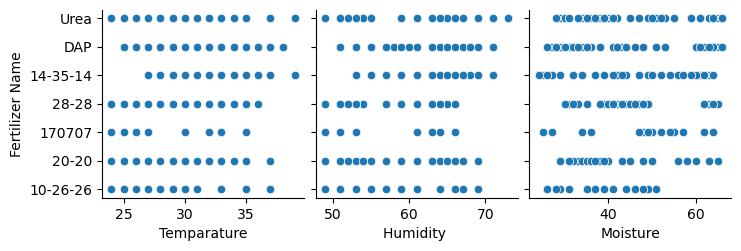

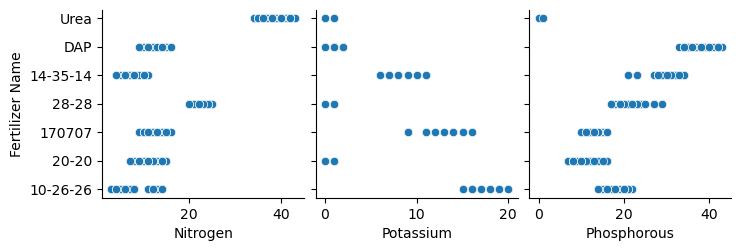

In [10]:
# Visualize Data 
sns.pairplot(data, x_vars=['Temparature', 'Humidity ', 'Moisture'], y_vars='Fertilizer Name', kind='scatter')
sns.pairplot(data, x_vars=['Nitrogen','Potassium','Phosphorous'], y_vars='Fertilizer Name', kind='scatter')

plt.show()

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Create an SVR model
#svr = SVR(kernel='linear', C=1.0)  
svr = SVR(kernel='sigmoid', C=1.0, gamma='scale')


In [13]:
# Train the SVR model on the training data
svr.fit(X_train, Y_train)

SVR(kernel='sigmoid')

In [14]:
# Make predictions on the test data
Y_pred = svr.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

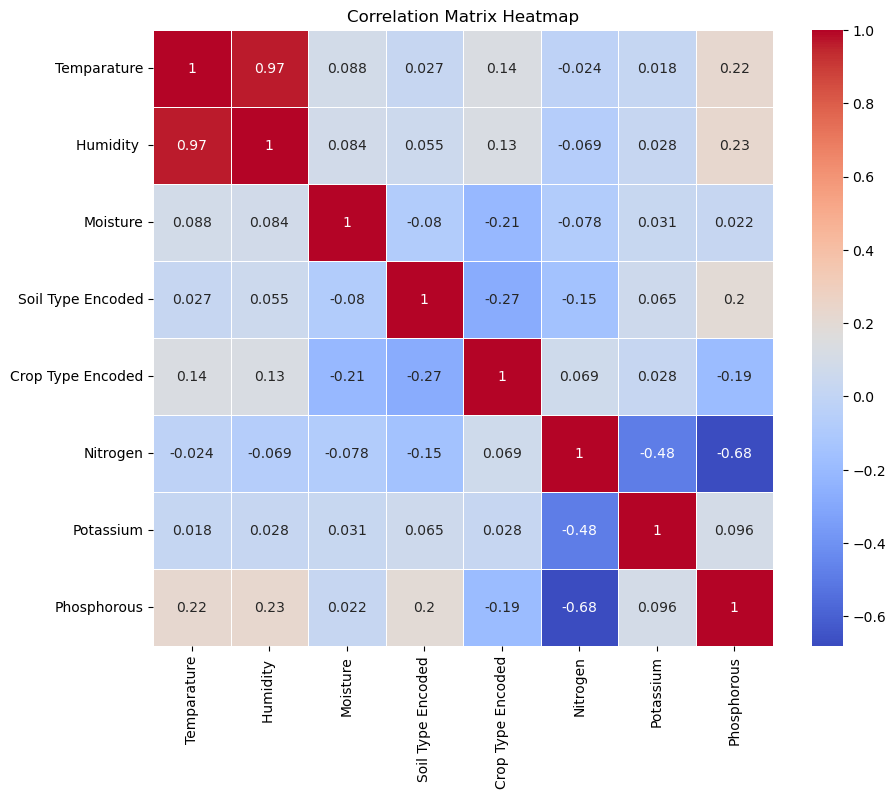

In [16]:
# Calculate the correlation matrix
corr_matrix = X.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Input values and get predictions
print("Enter the following values for prediction:")
temperature = float(input("Temperature: "))
humidity = float(input("Humidity: "))
moisture = float(input("Moisture: "))
soil_type_encoded = int(input("Soil Type (0 for Sandy, 1 for Red, 2 for Loamy, 3 for Clayey, 4 for Black): "))
crop_type_encoded = int(input("Crop Type (0 for Barley, 1 for Cotton, 2 for Ground Nuts, 3 for Maize, 4 for Millets, 5 for Oil seeds, 6 for Paddy, 7 for Pulses, 8 for Sugarcane, 9 for Tobacco, 10 for Wheat): "))
nitrogen = float(input("Nitrogen: "))
potassium = float(input("Potassium: "))
phosphorous = float(input("Phosphorous: "))

# Create a DataFrame with the input values
input_data = pd.DataFrame({
    'Temparature': [temperature],
    'Humidity ': [humidity],
    'Moisture': [moisture],
    'Soil Type Encoded': [soil_type_encoded],
    'Crop Type Encoded': [crop_type_encoded],
    'Nitrogen': [nitrogen],
    'Potassium': [potassium],
    'Phosphorous': [phosphorous]
})

# Use the trained SVR model to make a prediction
predicted_fertilizer_encoded = svr.predict(input_data)
rounded_predictions = np.round(predicted_fertilizer_encoded)

# Ensure the prediction is positive
if rounded_predictions < 0:
    rounded_predictions = abs(rounded_predictions)

# Convert rounded_predictions to integer
rounded_predictions = int(rounded_predictions)

# Decode the predicted fertilizer name
predicted_fertilizer_name = label_encoder.inverse_transform([rounded_predictions])

print(f"Predicted Fertilizer Name: {predicted_fertilizer_name[0]}")

Enter the following values for prediction:


ValueError: could not convert string to float: ''

In [ ]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.090239055143411
R-squared (R2): 0.1779972806585438
